In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np

realtor_data = "Resources/RealtorData.csv"
realtor_file_df = pd.read_csv(realtor_data, encoding="ISO-8859-1")
realtor_file_df

# Initial Data file.

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1401061,for_sale,NaN,NaN,155.00,Perrysburg,New York,14129.0,NaN,NaN,325000.0
1401062,for_sale,4.0,2.0,0.36,Silver Creek,New York,14136.0,2026.0,2000-09-01,187900.0
1401063,for_sale,10.0,4.0,0.43,Brocton,New York,14716.0,4802.0,1994-12-01,120000.0
1401064,for_sale,2.0,2.0,0.14,Dunkirk,New York,14048.0,1568.0,2003-04-15,92000.0


In [2]:
# Dropping Duplicates
realtor_file_df.drop_duplicates()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1401002,for_sale,3.0,2.0,0.22,Friendship,New York,14739.0,532.0,2004-06-22,118500.0
1401048,for_sale,1.0,1.0,0.25,Forestville,New York,14062.0,696.0,NaN,139000.0
1401058,for_sale,3.0,2.0,3.00,Gerry,New York,14740.0,1568.0,1999-12-27,189900.0
1401059,for_sale,5.0,2.0,0.55,Brocton,New York,14716.0,4260.0,NaN,95000.0


In [6]:
# Adding New Column for if a house has been previously sold and filling empty cells
realtor_file_df['prev_sold_encoded'] = realtor_file_df['prev_sold_date'].map(lambda x: 'Yes' if pd.notna(x) else 'No')
realtor_file_df.fillna(0,inplace=True)

In [7]:
# Naming DataFrame for use.
new_york_df = realtor_file_df[realtor_file_df['city'] == 'New York']
new_york_df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_encoded
465089,for_sale,2.0,2.0,0.00,New York,New York,10021.0,0.0,0,1185000.0,Yes
465111,for_sale,12.0,14.0,0.00,New York,New York,10014.0,8528.0,0,29995000.0,Yes
465513,for_sale,2.0,2.0,0.00,New York,New York,10022.0,1425.0,0,895000.0,Yes
465515,for_sale,1.0,2.0,0.00,New York,New York,10005.0,1166.0,2014-01-10,985000.0,Yes
465516,for_sale,1.0,1.0,0.00,New York,New York,10065.0,761.0,2020-08-18,810000.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
1117009,for_sale,0.0,1.0,0.00,New York,New York,11432.0,0.0,2015-04-09,150000.0,Yes
1117465,for_sale,4.0,3.0,0.00,New York,New York,11375.0,2200.0,2021-10-18,1825500.0,Yes
1117972,for_sale,1.0,1.0,0.00,New York,New York,11375.0,0.0,2006-09-13,350000.0,Yes
1118260,for_sale,4.0,3.0,0.00,New York,New York,11423.0,0.0,1987-06-12,990000.0,Yes


In [11]:
# Gathering general Statistics
mean_numpy = round(np.mean(new_york_df["price"]),2)

median_numpy = round(np.median(new_york_df["price"]),2)

print(f"The average price of a house for sale in New York City is ${mean_numpy}, with the median price of ${median_numpy}")

The average price of a house for sale in New York City is $2612111.87, with the median price of $1265000.0


In [12]:
# Calculate mode
mode_scipy = st.mode(new_york_df["price"])
print(f"The most common price shown from the data is {mode_scipy}")

The most common price shown from the data is ModeResult(mode=array([995000.]), count=array([681]))


C:\Users\agonz\AppData\Local\Temp\ipykernel_26932\1876030870.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_scipy = st.mode(new_york_df["price"])


In [14]:
# Variance and St. Dev
var_numpy = np.var(new_york_df["price"],ddof = 0)
print(f"The population variance is {var_numpy}")

sd_numpy = np.std(new_york_df["price"],ddof = 0)
print(f"The population standard deviation is {sd_numpy}")

The population variance is 20964716425480.35
The population standard deviation is 4578724.322939781


In [15]:
# Quartiles
quartiles = new_york_df["price"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of price is: {lowerq}")
print(f"The upper quartile of price is: {upperq}")
print(f"The interquartile range of price is: {iqr}")
print(f"The the median of price is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of price is: 695000.0
The upper quartile of price is: 2725000.0
The interquartile range of price is: 2030000.0
The the median of price is: 1265000.0 
Values below -2350000.0 could be outliers.
Values above 5770000.0 could be outliers.


In [20]:
# Calculate the number of "Common" living plans and their avergae price

new_york_df2 = new_york_df.copy()
new_york_df2["bed-bath"] = new_york_df2.bed.astype(int).astype(str) + "-" + new_york_df2.bath.astype(int).astype(str)
df = new_york_df2[["bed-bath","price"]].groupby("bed-bath",as_index=False).agg({"price":["mean","count"]}) 
df.columns = ["bed-bath", "avg_price", "count"]
df = df.sort_values(by='count', ascending=False)
df = df.head(10)
df['Cumulative Percentage'] = df['count'].cumsum() / df['count'].sum() * 100
pd.options.display.float_format = '{:.0f}'.format

df

,bed-bath,avg_price,count,Cumulative Percentage
8,1-1,858825,15076,31
25,2-2,1863496,9415,50
1,0-1,578264,6797,64
24,2-1,871587,3535,71
32,3-3,3776891,3224,78
26,2-3,3664013,2667,83
31,3-2,2101309,2526,88
9,1-2,1529563,2382,93
33,3-4,6640155,2042,97
41,4-4,6336167,1238,100


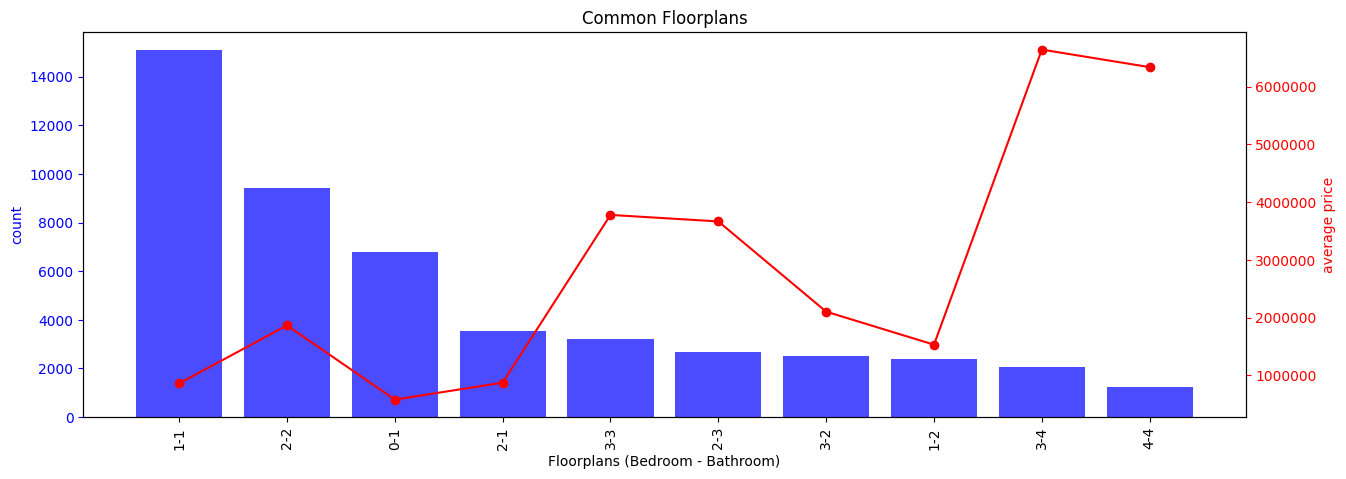

In [27]:
# show on graph
plt.rcParams["axes.formatter.limits"] = (-99, 99)
fig, ax1 = plt.subplots(figsize=(15,5))

ax1.bar(df['bed-bath'], df['count'], color='b', alpha=0.7, label='Count')
ax1.set_xlabel('Floorplans (Bedroom - Bathroom)')
ax1.set_ylabel('count', color='b')
ax1.tick_params('y', colors='b')
plt.xticks(rotation="vertical")

ax2 = ax1.twinx()
ax2.plot(df['bed-bath'], df['avg_price'], color='r', marker='o', label='Avg. Price')
ax2.set_ylabel('average price', color='r')
ax2.tick_params('y', colors='r')

plt.title('Common Floorplans')
plt.show()

Values above $5770000.0 could be outliers.


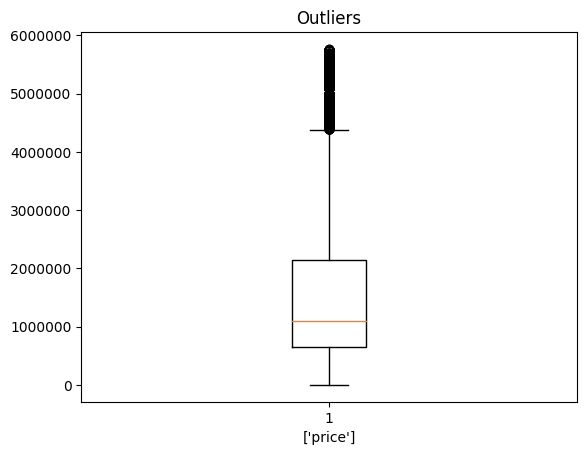

In [37]:
# Box Plot for outliers

clean_df=new_york_df[[col for col in new_york_df.columns if pd.api.types.is_numeric_dtype(new_york_df[col])]]

x_axis=['price']
quartiles = clean_df["price"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values above ${upper_bound} could be outliers.")

df2 = clean_df[~((clean_df[x_axis] < (lowerq - 1.5 * iqr)) | (clean_df[x_axis] > (upperq + 1.5 * iqr))).any(axis=1)]

x_axis=['price']


plt.boxplot(df2[x_axis])
plt.xlabel(x_axis)
plt.title('Outliers')
plt.show()